In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab
from pylab import figure, subplot, text, xlim, ylim, title, plot, axvline, ylabel, xlabel, legend
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, describe, spearmanr
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

In [32]:
import os
os.environ['PATH'] = "/software/texlive/2020/bin/x86_64-linux:" + os.environ['PATH']

matplotlib.rcParams['text.usetex'] = False

In [3]:
orig_params = pylab.rcParams.copy()
params = {'legend.fontsize': '20',
          'figure.figsize': (15, 10),
          'axes.labelsize': '20',
          'axes.titlesize':'25',
          'xtick.labelsize':'20',
          'ytick.labelsize':'20',
          'axes.linewidth': '0.5',
          'pdf.fonttype': '42'}
pylab.rcParams.update(params)
# pylab.style.use('seaborn-white')

In [33]:
#PARAM VALS FOR THIS RUN
# sim_file_use = '/home/mzo5929/Keerthana/grnInference/simulationData/simulations_parameter_scan_ec50_equals_median_kOn_added/k_Tf_on/samples_replicates_over_time_with_regulation_param_index_9_run_9.csv'
sim_file_use = '/home/mzo5929/Keerthana/grnInference/simulationData/general_simulation_data/test_data/simulation_matrix101_parameter_sheet101.csv'
# sim_file_use = '/home/mzo5929/Keerthana/grnInference/simulationData/simulations_rerun/with_regulation/median/samples_replicates_with_regulation_median_0.csv'
num_sampling_times = 24
num_cells = 10e3

updated_df = pd.read_csv(sim_file_use)


In [34]:
updated_df = updated_df.sort_values(by=['timestep', 'cell_id']).reset_index(drop=True)
updated_df

,gene_1_is_bursting,gene_1_unspliced_mRNA,gene_1_spliced_mRNA,gene_1_protein,gene_1_k_on_adjusted,gene_1_total_mRNA,gene_1_mRNA_ever_produced,gene_1_protein_ever_produced,gene_2_is_bursting,gene_2_unspliced_mRNA,gene_2_spliced_mRNA,gene_2_protein,gene_2_k_on_adjusted,gene_2_total_mRNA,gene_2_mRNA_ever_produced,gene_2_protein_ever_produced,cell_id,timestep,replicate
0,0.0,4.163260e-21,3.424410,58.160214,0.27,3.424410,2486.40,513.309424,1.0,31.657929,302.283307,1601.332157,1.918571,333.941236,21945.000000,13093.723356,0,60,0
1,0.0,4.163260e-21,1.424410,57.103181,0.27,1.424410,2486.40,513.252391,0.0,13.177342,244.297227,1610.937549,1.883007,257.474569,21888.533333,13091.328748,0,60,1
2,0.0,2.578867e-04,57.197297,70.584567,0.27,57.197555,3032.96,625.873789,0.0,0.080586,361.661238,1589.293951,2.302694,361.741824,22365.933333,13352.419887,1,60,0
3,0.0,0.000000e+00,68.943226,68.980791,0.27,68.943226,3055.36,626.270013,0.0,0.000002,352.475155,1598.284400,2.256740,352.475157,22355.666667,13351.410336,1,60,1
4,0.0,1.304067e-02,55.706930,127.035859,0.27,55.719971,3283.84,656.171708,0.0,2.327091,666.520099,1890.355353,3.343889,668.847189,23864.866667,14181.171213,2,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959995,0.0,1.935304e-08,21.418648,89.440269,0.27,21.418648,3328.64,678.541971,0.0,5.380153,525.635115,1854.005904,2.764409,531.015269,23695.466667,14134.635277,19997,17279,0
959996,0.0,6.282664e+00,69.184825,94.938640,0.27,75.467489,3315.20,646.335918,0.0,1.903106,390.893061,1818.595296,2.874023,392.796166,26097.866667,15479.502124,19998,17279,0
959997,0.0,6.282664e+00,69.184825,94.938640,0.27,75.467489,3315.20,646.335918,0.0,1.903106,390.893061,1818.595296,2.874023,392.796166,26097.866667,15479.502124,19998,17279,0
959998,0.0,4.823480e-04,31.712058,72.561597,0.27,31.712541,2611.84,527.230390,0.0,0.000310,311.229699,1596.302049,2.357850,311.230008,20682.200000,12331.891984,19999,17279,0


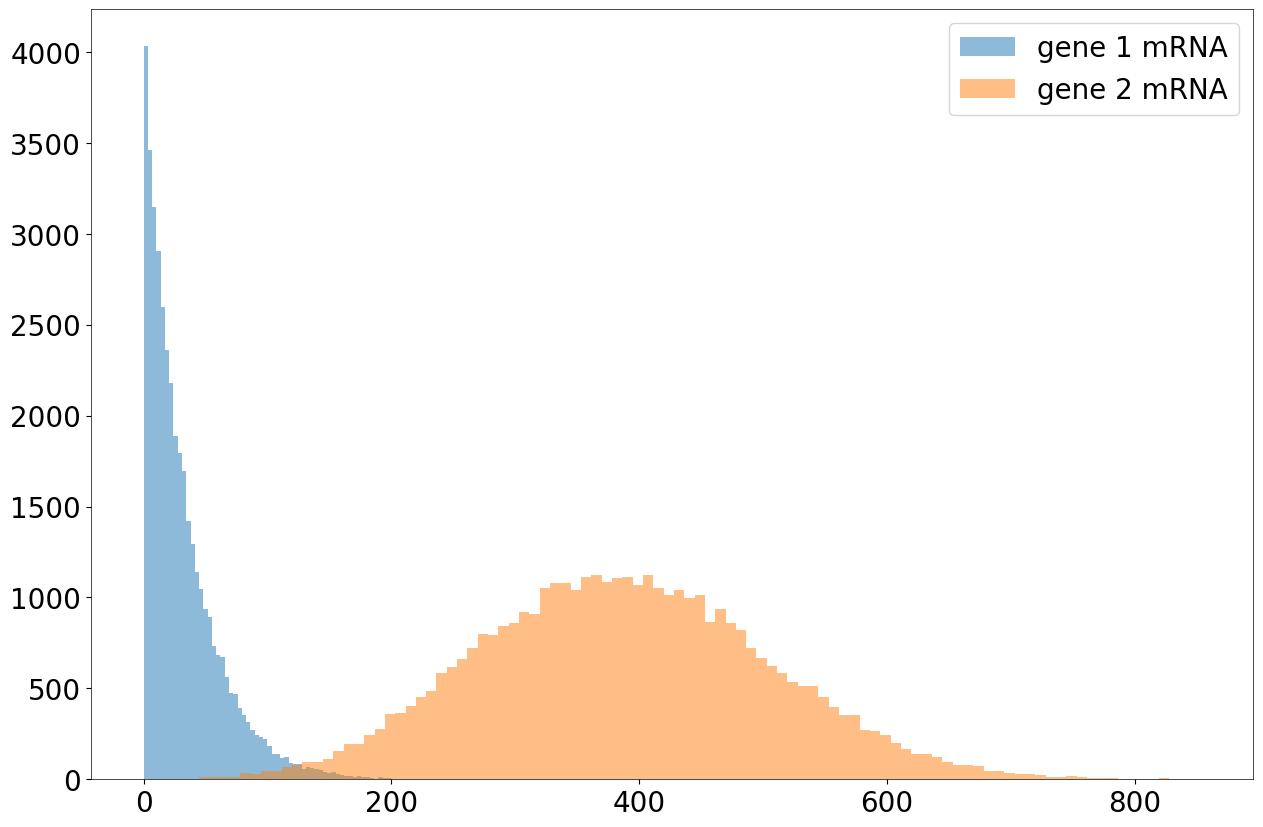

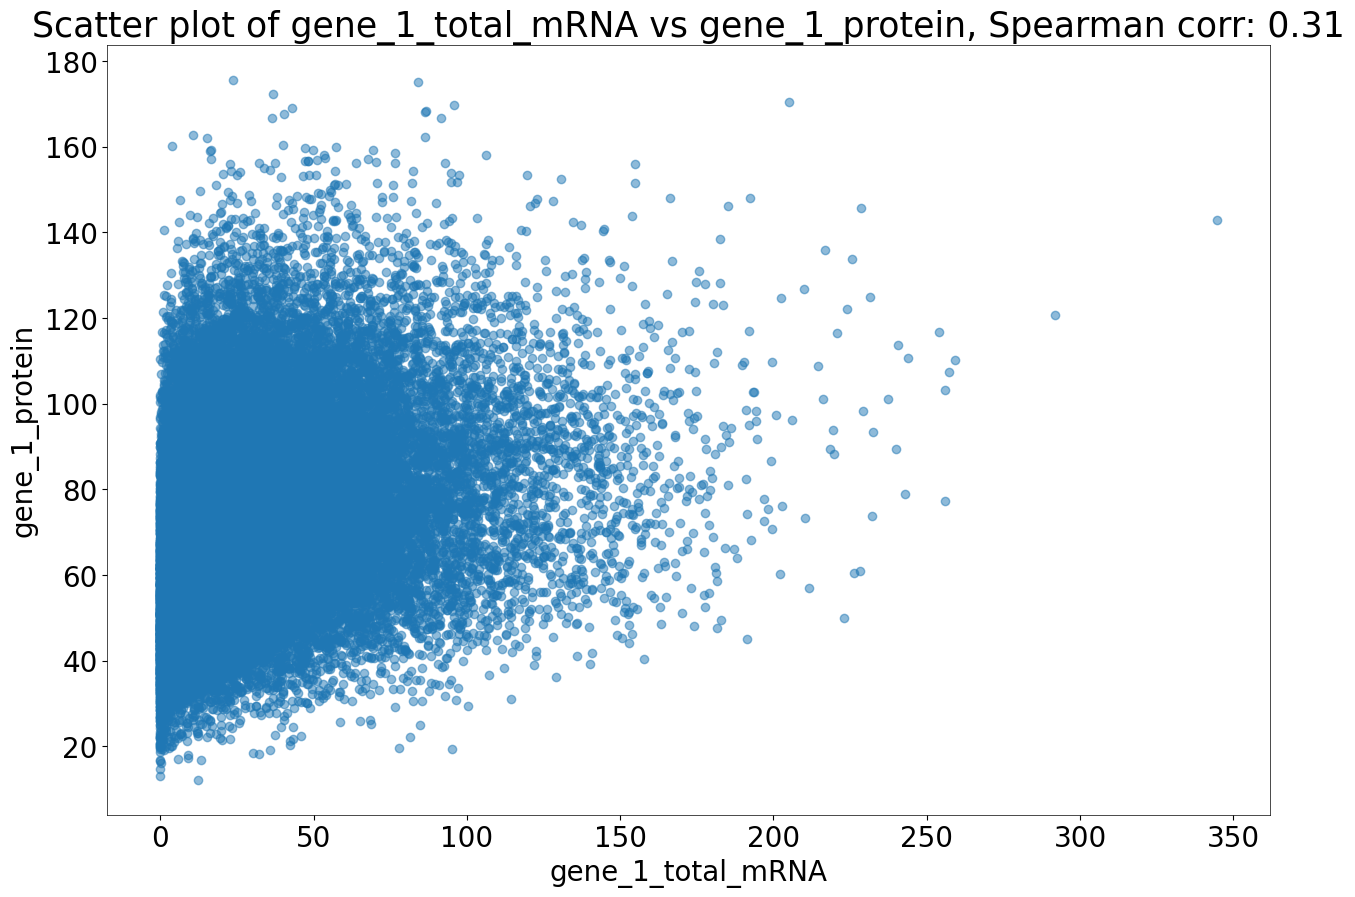

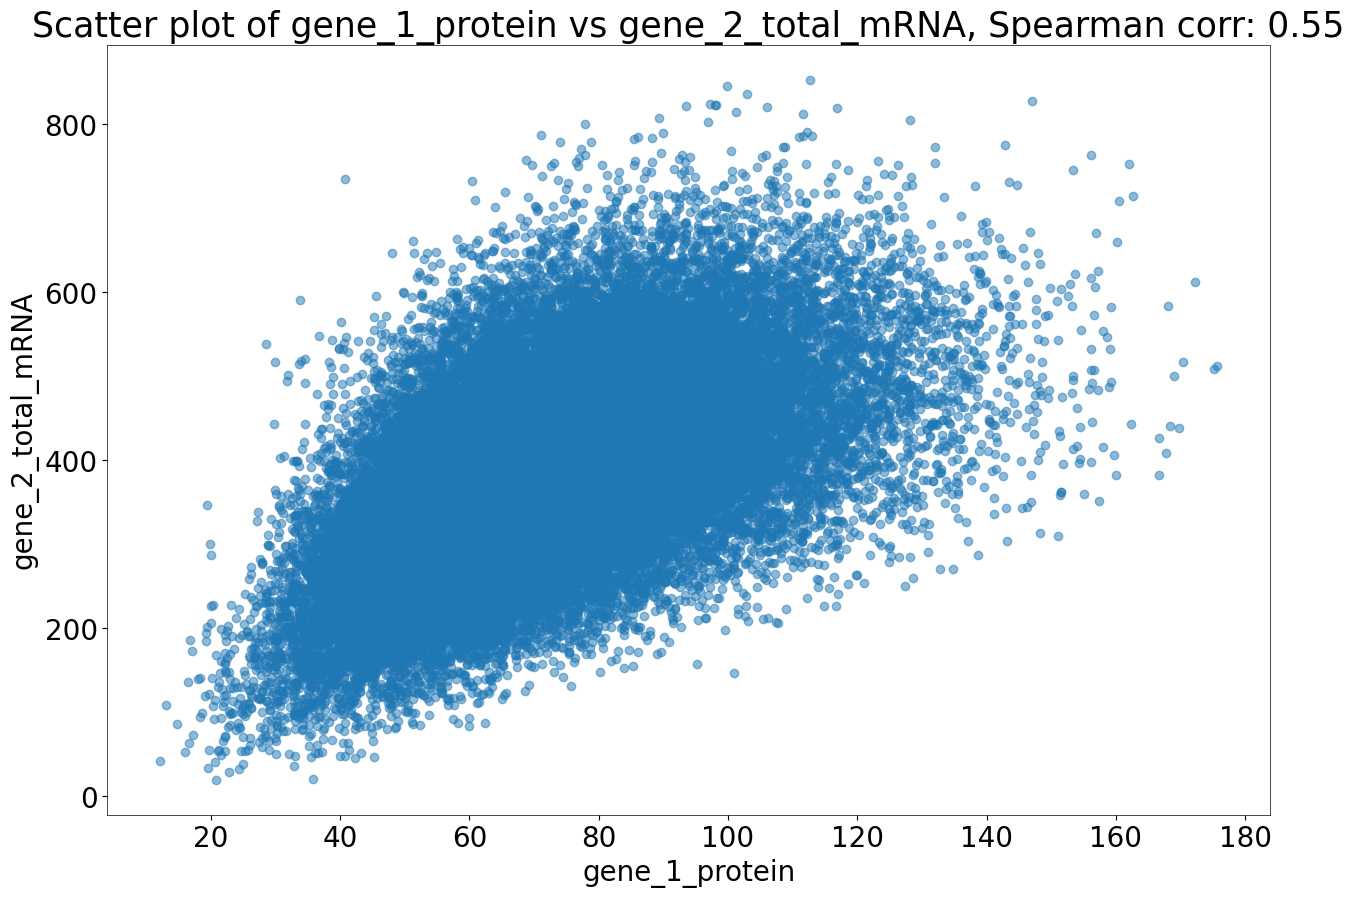

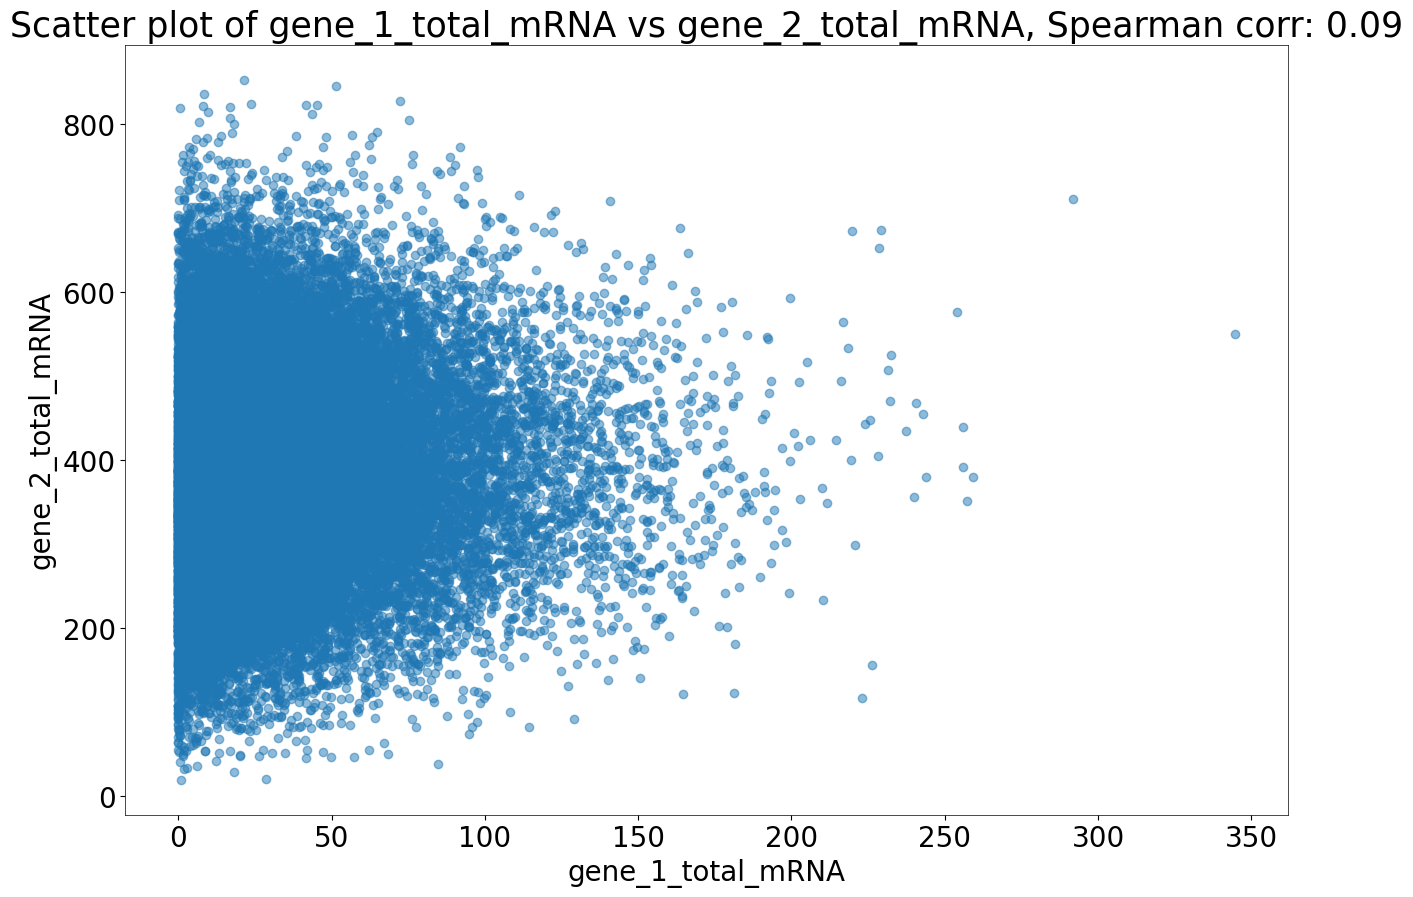

In [35]:
#First compare regulation
time = 300
singleTime_df = updated_df[updated_df['timestep'] == time]
singleTime_df = singleTime_df.reset_index(drop=True)

plt.hist(singleTime_df['gene_1_total_mRNA'], bins=100, alpha=0.5, label='gene 1 mRNA')
plt.hist(singleTime_df['gene_2_total_mRNA'], bins=100, alpha=0.5, label='gene 2 mRNA')
plt.legend(loc='upper right')
plt.show()

plt.scatter(singleTime_df['gene_1_total_mRNA'], singleTime_df['gene_1_protein'], alpha=0.5)
corr = spearmanr(singleTime_df['gene_1_total_mRNA'], singleTime_df['gene_1_protein'])
plt.ylabel('gene_1_protein')
plt.xlabel('gene_1_total_mRNA')
plt.title('Scatter plot of gene_1_total_mRNA vs gene_1_protein, Spearman corr: {:.2f}'.format(corr.correlation))
plt.show()

plt.scatter(singleTime_df['gene_1_protein'], singleTime_df['gene_2_total_mRNA'], alpha=0.5)
corr = spearmanr(singleTime_df['gene_1_protein'], singleTime_df['gene_2_total_mRNA'])
plt.ylabel('gene_2_total_mRNA')
plt.xlabel('gene_1_protein')
plt.title('Scatter plot of gene_1_protein vs gene_2_total_mRNA, Spearman corr: {:.2f}'.format(corr.correlation))
plt.show()

plt.scatter(singleTime_df['gene_1_total_mRNA'], singleTime_df['gene_2_total_mRNA'], alpha=0.5)
corr = spearmanr(singleTime_df['gene_1_total_mRNA'], singleTime_df['gene_2_total_mRNA'])
plt.ylabel('gene_2_total_mRNA')
plt.xlabel('gene_1_total_mRNA')
plt.title('Scatter plot of gene_1_total_mRNA vs gene_2_total_mRNA, Spearman corr: {:.2f}'.format(corr.correlation))
plt.show()